# Quantum Computing basics with IBM's Qiskit

This is a basic guide to get started with Quantum Computing using IBM's Qiskit library. This notebook follows the Basics of Quantum Information course at IBM Quantum Learning, and the theoretical concepts in this notebook can be found at [Unit 1: Single Systems](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems).

Since Qiskit is a library written in Python, we start by understanding scientific computing with Python, hence we begin by looking at defining matrices first with the `numpy` library

In [ ]:
import numpy as np

# define two matrices ket0 and ket1, then print their averages

ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])

print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


We can also define matrices that represent operations on vectors.

In [ ]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])

M = M1 / 2 + M2 / 2

print(M)

The `matmul` method from `numpy` can perform matrix multiplication, including matrix-vector multiplication.

In [ ]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

and we can format the output into a more desirable format with the `array_to_latex` function from `qiskit.visualization` module

In [ ]:
from qiskit.visualization import array_to_latex

# note that the `display` function used here is a builtin from Python

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

In [ ]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 /  3])
w = Statevector([1 / 3, 2 / 3])

display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

In [ ]:
display(u.is_valid())
display(w.is_valid())

In [44]:
display(v.draw("latex"))

outcome, state = v.measure()
print(f"Measured: {outcome}\n Post-measurement state: ")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 0
 Post-measurement state: 


<IPython.core.display.Latex object>

In [ ]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [43]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

In [47]:
v = Statevector([1, 0])

v = v.evolve(H)
v= v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

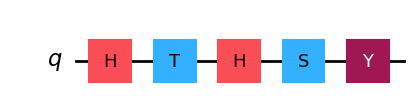

<IPython.core.display.Latex object>

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

In [56]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw('latex'))

<IPython.core.display.Latex object>

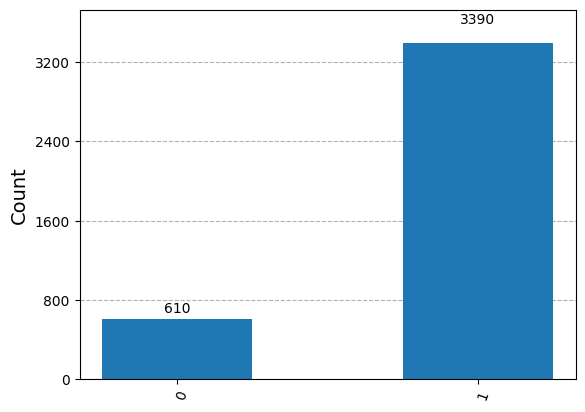

In [57]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))